<div style="display: table; width: 100%;">
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 70%;">
    <h1>Métodos Analíticos y de Optimización Aplicados a la Inteligencia Artificial</h1>
  </div>
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 30%;">
    <img src="https://github.com/UIDE-Tareas/7-Metodos-Analiticos-Optimizacion-Aplicados-IA-Tarea2/blob/main/Assets/UideLogo.png?raw=true" alt="logo UIDE" style="width:50%;">
  </div>
</div>
<hr />

### 🟦 Componente Práctico 1  
🟡 Grupo: 5      
🟡 Semana: 2      
🟡 Docente:  Diego Rodriguez Copado     

### 🟦 Realizado por:   
Estudiantes

💻 Andrade Peñafiel Mateo   

💻 Huilca Revelo Victor German   

💻 Espinoza Bone Jose Manuel

### 🟦 Objetivo y alcance del trabajo 
En este segundo caso práctico vamos a resolver problemas de clustering. Esta herramienta 
nos da la capacidad de resolver fácilmente problemas sencillos de un modo muy visual.

### 🟦 [Código fuente original - https://github.com/UIDE-Tareas/7-Metodos-Analiticos-Optimizacion-Aplicados-IA-Tarea2](https://github.com/UIDE-Tareas/7-Metodos-Analiticos-Optimizacion-Aplicados-IA-Tarea2)
Con [git](https://git-scm.com/) instalado. En Windows, Linux o MacOS ejecutar el comando.

```
git clone "https://github.com/UIDE-Tareas/7-Metodos-Analiticos-Optimizacion-Aplicados-IA-Tarea2"
```

# 0️⃣ Preparar entorno

Funciones base para utilizar si son requeridas en el presente notebook. Adicional hay funciones utilitarias para utilizar con pandas.DataFrame y finalmente las funciones para cumplir con los objetivos del presente trabajo práctico.

In [75]:
# UTILIDADES PARA GESTIÓN DE DEPENDENCIAS E INFORMACIÓN DEL ENTORNO

import sys
import subprocess
import os
from pathlib import Path
from enum import Enum
import zipfile
from typing import Optional
from typing import Iterable
from dataclasses import dataclass
from typing import cast
from typing import Tuple
from enum import Enum
from types import SimpleNamespace
from typing import Any
from typing import Protocol
from typing import Literal
from typing import Sequence

# Libs a instalar
LIBS = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "requests",
    "wcwidth",
    "kneed",
]

class ConsoleColor(Enum):
    RED = "\033[91m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    BLUE = "\033[94m"
    MAGENTA = "\033[95m"
    CYAN = "\033[96m"
    WHITE = "\033[97m"
    RESET = "\033[0m"


def PrintColor(message: str, color: ConsoleColor) -> str:
    RESET = ConsoleColor.RESET.value
    return f"{color.value}{message}{RESET}"


def ShowMessage(
    message: str, title: str, icon: str, color: ConsoleColor, end: str = "\n"
):
    colored_title = PrintColor(icon + f"  " + title.upper() + ":", color)
    print(f"{colored_title} {message}", end=end)


def ShowInfoMessage(
    message: str, title: str = "Info", icon: str = "ℹ️", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.CYAN, end)


def ShowSuccessMessage(
    message: str, title: str = "Success", icon: str = "✅", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.GREEN, end)


def ShowErrorMessage(
    message: str, title: str = "Error", icon: str = "❌", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.RED, end)


def ShowWarningMessage(
    message: str, title: str = "Warning", icon: str = "⚠️", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.YELLOW, end)


# Funcion para ejecutar comandos
def RunCommand(
    commandList: list[str], printCommand: bool = True, printError: bool = True
) -> subprocess.CompletedProcess[str]:
    print("⏳", " ".join(commandList))

    if printCommand:
        proc = subprocess.Popen(
            commandList,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            bufsize=1,
            universal_newlines=True,
        )

        out_lines: list[str] = []
        assert proc.stdout is not None
        for line in proc.stdout:
            print(line, end="")
            out_lines.append(line)

        proc.wait()
        err_text = ""
        if proc.stderr is not None:
            err_text = proc.stderr.read() or ""

        if proc.returncode != 0 and printError and err_text:
            ShowErrorMessage(err_text, "", end="")
            # print(err_text, end="")

        return subprocess.CompletedProcess(
            args=commandList,
            returncode=proc.returncode,
            stdout="".join(out_lines),
            stderr=err_text,
        )

    else:
        result = subprocess.run(
            commandList, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
        )
        if result.returncode != 0 and printError and result.stderr:
            ShowErrorMessage(result.stderr, "", end="")
            # print(result.stderr, end="")
        return result


# Función para instalar las dependencias
def InstallDeps(libs: Optional[list[str]] = None):
    print("ℹ️ Installing deps.")
    printCommand = False
    printError = True
    RunCommand(
        [sys.executable, "-m", "pip", "install", "--upgrade", "pip"],
        printCommand=printCommand,
        printError=printError,
    )
    if libs is None or libs.count == 0:
        print("No hay elementos a instalar.")
    else:
        RunCommand(
            [sys.executable, "-m", "pip", "install", *libs],
            printCommand=printCommand,
            printError=printError,
        )
        print("Deps installed.")
    print()


# Función para mostrar info el ambiente de ejecución
def ShowEnvironmentInfo():
    print("ℹ️  Environment Info:")
    print("Python Version:", sys.version)
    print("Platform:", sys.platform)
    print("Executable Path:", sys.executable)
    print("Current Working Directory:", os.getcwd())
    print("VIRTUAL_ENV:", os.environ.get("VIRTUAL_ENV"))
    print("sys.prefix:", sys.prefix)
    print("sys.base_prefix:", sys.base_prefix)
    print()


InstallDeps(LIBS)
ShowEnvironmentInfo()
import requests


@dataclass(frozen=True)
class BoxStyle:
    TL: str
    TR: str
    BL: str
    BR: str
    H: str
    V: str

class TitleBoxLineStyle(Enum):
    SIMPLE = BoxStyle("┌", "┐", "└", "┘", "─", "│")
    DOUBLE = BoxStyle("╔", "╗", "╚", "╝", "═", "║")
    ROUNDED = BoxStyle("╭", "╮", "╰", "╯", "─", "│")
    HEAVY = BoxStyle("┏", "┓", "┗", "┛", "━", "┃")
    ASCII = BoxStyle("+", "+", "+", "+", "-", "|")
    DOUBLE_BOLD = BoxStyle("╔", "╗", "╚", "╝", "╬", "║")
    BLOCK = BoxStyle("█", "█", "█", "█", "█", "█")
    HEAVY_CROSS = BoxStyle("╒", "╕", "╘", "╛", "╪", "┃")
    METAL = BoxStyle("╞", "╡", "╘", "╛", "═", "║")


# Función para mostrar un título con recuadro
def ShowTitleBox(
    text: str,
    max_len: int = 100,
    boxLineStyle: TitleBoxLineStyle = TitleBoxLineStyle.SIMPLE,
    color: ConsoleColor = ConsoleColor.CYAN,
):
    try:

        def vislen(s: str) -> int:
            from wcwidth import wcswidth as _w

            n = _w(s)
            return n if n >= 0 else len(s)

    except Exception:

        def vislen(s: str) -> int:
            return len(s)

    pad = 1
    tlen = vislen(text)
    inner = max(max_len, tlen)
    left = (inner - tlen) // 2
    right = inner - tlen - left

    top = f"{boxLineStyle.value.TL}{boxLineStyle.value.H * (inner + 2 * pad)}{boxLineStyle.value.TR}"
    mid = f"{boxLineStyle.value.V}{' ' * pad}{' ' * left}{text}{' ' * right}{' ' * pad}{boxLineStyle.value.V}"
    bot = f"{boxLineStyle.value.BL}{boxLineStyle.value.H * (inner + 2 * pad)}{boxLineStyle.value.BR}"
    print(PrintColor("\n".join([top, mid, bot]), color))


# Función para descargar un archivo
def DownloadFile(uri: str, filename: str, overwrite: bool = False, timeout: int = 20, printInfo: bool = True):
    dest = Path(filename).resolve()
    if dest.exists() and dest.is_file() and dest.stat().st_size > 0 and not overwrite:
        if printInfo:
            print(
                f'✅ Ya existe: "{dest}". No se descarga (use overwrite=True para forzar).'
            )
        return
    if dest.parent and not dest.parent.exists():
        dest.parent.mkdir(parents=True, exist_ok=True)
    if printInfo:
        print(f'ℹ️ Descargando "{uri}" → "{dest}"')
    try:
        with requests.get(uri, stream=True, timeout=timeout) as resp:
            resp.raise_for_status()
            tmp = dest.with_suffix(dest.suffix + ".part")
            with open(tmp, "wb") as f:
                for chunk in resp.iter_content(chunk_size=1024 * 64):
                    if chunk:  # filtra keep-alive chunks
                        f.write(chunk)
            tmp.replace(dest)
        if printInfo: 
            print(f'✅ Archivo "{dest}" descargado exitosamente.')
    except requests.exceptions.RequestException as e:
        print(f"❌ Error al descargar: {e}")


# Función para descomprimir un archivo zip
def UnzipFile(filename: str, outputDir: str):
    print(f'ℹ️ Descomprimiendo "{filename}" en "{outputDir}"')
    try:
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall(outputDir)
        print(f"Descomprimido en: {os.path.abspath(outputDir)}")
    except Exception as e:
        print(f"Error: {e}")


ℹ️ Installing deps.
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install numpy pandas matplotlib seaborn scikit-learn requests wcwidth kneed
Deps installed.

ℹ️  Environment Info:
Python Version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Platform: win32
Executable Path: c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe
Current Working Directory: c:\Users\Megam\OneDrive\Escritorio\7-Metodos-Analiticos-Optimizacion-Aplicados-IA-Tarea2
VIRTUAL_ENV: None
sys.prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313
sys.base_prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313



In [76]:
# UTILIDADES PARA ANÁLISIS Y MANIPULACIÓN DE DATAFRAMES

# Importar libraries
import pandas as pd
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.figure import Figure
from matplotlib.axes import Axes

from pandas import DataFrame
from pandas import Series
from sklearn.utils import Bunch

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import fcluster
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.datasets import make_blobs

warnings.filterwarnings("ignore")

# Configurar opciones de Pandas
pd.set_option("display.float_format", "{:.2f}".format)
pandas.set_option("display.max_rows", None)
pandas.set_option("display.max_columns", None)


# Función para mostrar la información del DataFrame.
def ShowDfInfo(df: pandas.DataFrame, title):
    display(f"ℹ️ INFO {title} ℹ️")
    df.info()
    display()


# Función para mostrar las n primeras filas del DataFrame.
def ShowDfHead(df: pandas.DataFrame, title: str, headQty=10):
    display(f"ℹ️ {title}: Primeros {headQty} elementos.")
    display(df.head(headQty))
    display()


# Función para mostrar las n últimas filas del DataFrame.
def ShowDfTail(df: pandas.DataFrame, title: str, tailQty=10):
    display(f"ℹ️ {title}: Últimos {tailQty} elementos.")
    display(df.tail(tailQty))
    display()


# Mostrar el tamaño del DataFrame
def ShowDfShape(df: pandas.DataFrame, title: str):
    display(f"ℹ️ {title} - Tamaño de los datos")
    display(f"{df.shape[0]} filas x {df.shape[1]} columnas")
    display()


# Función para mostrar la estadística descriptiva de todas las columnas del DataFrame, por tipo de dato.
def ShowDfStats(df: pandas.DataFrame, title: str = ""):
    display(f"ℹ️ Estadística descriptiva - {title}")
    numeric_cols = df.select_dtypes(include="number")
    if not numeric_cols.empty:
        display("    🔢 Columnas numéricas".upper())
        numeric_desc = (
            numeric_cols.describe().round(2).T
        )  # Transpuesta para añadir columna
        numeric_desc["var"] = numeric_cols.var(numeric_only=True).round(2)
        display(numeric_desc.T)
    non_numeric_cols = df.select_dtypes(
        include=["boolean", "string", "category", "object"]
    )
    if not non_numeric_cols.empty:
        display("    🔡 Columnas no numéricas".upper())
        non_numeric_desc = non_numeric_cols.describe()
        display(non_numeric_desc)
    datetime_cols = df.select_dtypes(include=["datetime", "datetimetz"])
    if not datetime_cols.empty:
        display("    📅 Columnas fechas".upper())
        datetime_desc = datetime_cols.describe()
        display(datetime_desc)


# Función para mostrar una visión general completa del DataFrame
def ShowFullDfOverview(df, title, headQty=5, tailQty=5):
    ShowDfInfo(df, title)
    ShowDfStats(df, title)
    ShowDfShape(df, title)
    ShowDfHead(df, title, headQty=headQty)
    ShowDfTail(df, title, tailQty=tailQty)


# Función para mostrar los valores nulos o NaN de cada columna en un DataFrame
def ShowDfNanValues(df: pandas.DataFrame, title: str):
    display(f"ℹ️ Contador de valores Nulos - {title}")
    nulls_count = df.isnull().sum()
    nulls_df = nulls_count.reset_index()
    nulls_df.columns = ["Columna", "Cantidad_Nulos"]
    display(nulls_df)
    display()


# Tipos de correlación
class CorrelationType(Enum):
    ALL = "all"
    STRONG = "strong"
    WEAK = "weak"


# Muestra las correlaciones completas, débiles y fuertes.
def ShowDfCorrelation(
    df: pandas.DataFrame,
    title: str,
    fig: Optional[Figure] = None,
    ax: Optional[Axes] = None,
    level: CorrelationType = CorrelationType.ALL,
    umbral: float = 0.6,
    showTable: bool = False,
    figsize: tuple = (8, 6),
    annotate: bool = True,
):
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    display(f"ℹ️ {title.upper()} - MATRIZ DE CORRELACIÓN ({level.name})")

    corr = df.select_dtypes(include="number").corr()

    if level == CorrelationType.STRONG:
        corr = corr.where(np.abs(corr) >= umbral)
    elif level == CorrelationType.WEAK:
        corr = corr.where((np.abs(corr) < umbral) | (corr == 1))
    elif level != CorrelationType.ALL:
        raise ValueError(f"Invalid level: {level}")

    # ✅ Mostrar diagonal (1) y triángulo inferior
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

    sns.heatmap(
        corr,
        mask=mask,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        annot=annotate,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"label": "Coeficiente de correlación"},
        ax=ax
    )

    subtitle = (
        "Completa"
        if level == CorrelationType.ALL
        else f"Strong (|r| ≥ {umbral})"
        if level == CorrelationType.STRONG
        else f"Weak (|r| < {umbral})"
    )

    ax.set_title(
        f"Matriz de correlación ({subtitle})",
        fontsize=12,
        pad=15
    )

    ax.tick_params(axis="x", rotation=90)
    ax.tick_params(axis="y", rotation=0)

    plt.tight_layout()
    plt.show()

    if showTable:
        display(corr.round(3))

    return fig, corr

# Normaliza los nombres de las columnas del DataFrame.
def NormalizeColumnNames(df: pandas.DataFrame) -> pandas.DataFrame:
    df.columns = [
        col.strip().title().replace(" ", "").replace("_", "") for col in df.columns
    ]
    return df


def DropColumns(
    df: pandas.DataFrame, toDrop: list[str], inplace: bool = False
) -> pandas.DataFrame:
    if not toDrop:
        return df
    if inplace:
        df.drop(columns=df.columns.intersection(toDrop), inplace=True)
        return df
    else:
        return df.drop(columns=df.columns.intersection(toDrop))


# Para almacenar los datos del dataset
@dataclass
class Dataset:
    X: pandas.DataFrame
    y: pandas.DataFrame | None


# Muestra la información del Dataset
def ShowDatasetInfo(data: Dataset, title):
    tAux = title
    title = f"{tAux} - Caracteristicas - X"
    ShowDfInfo(data.X, title)
    ShowDfShape(data.X, title)
    ShowDfStats(data.X, title)
    ShowDfNanValues(data.X, title)
    ShowDfHead(data.X, title)
    ShowDfTail(data.X, title)
    title = f"{tAux} - Características - y"
    if data.y is None:
        display(f"ℹ️ {title}: No hay datos de etiquetas (y) disponibles.")
        return
    ShowDfInfo(data.y, title)
    ShowDfShape(data.y, title)
    ShowDfStats(data.y, title)
    ShowDfNanValues(data.y, title)
    ShowDfHead(data.y, title)
    ShowDfTail(data.y, title)


# Contrato para los escaladores
class ScalerProtocol(Protocol):
    def fit(self, X, y: Any = None) -> Any: ...
    def transform(self, X) -> Any: ...
    def fit_transform(self, X, y: Any = None) -> Any: ...


# Para almacenar los datos del dataset aplicado el escalador.
@dataclass
class ScaledDataset(Dataset):
    Scaler: ScalerProtocol

# Enum para los tipos de escaladores soportados
class ScalerType(Enum):
    STANDARD = "Standard"
    MIN_MAX = "minmax"
    ROBUST = "robust"
    MAX_ABS = "maxabs"
    NORMALIZER = "normalizer"
    QUANTILE = "quantile"
    POWER = "power"
    FUNCTION = "function"

# Crea una instancia de scaler según el Enum ScalerType.
def CreateScaler(scalerType: ScalerType, **kwargs) -> ScalerProtocol:
    if scalerType == ScalerType.STANDARD:
        return StandardScaler(**kwargs)
    if scalerType == ScalerType.MIN_MAX:
        return MinMaxScaler(**kwargs)
    if scalerType == ScalerType.ROBUST:
        return RobustScaler(**kwargs)
    if scalerType == ScalerType.MAX_ABS:
        return MaxAbsScaler(**kwargs)
    if scalerType == ScalerType.NORMALIZER:
        return Normalizer(**kwargs)
    if scalerType == ScalerType.QUANTILE:
        return QuantileTransformer(**kwargs)
    if scalerType == ScalerType.POWER:
        return PowerTransformer(**kwargs)
    if scalerType == ScalerType.FUNCTION:
        return FunctionTransformer(**kwargs)
    raise ValueError(f"ScalerType no soportado: {scalerType}")

def DetectScaler(scaler: ScalerProtocol) -> ScalerType:
    if isinstance(scaler, StandardScaler):
        return ScalerType.STANDARD
    if isinstance(scaler, MinMaxScaler):
        return ScalerType.MIN_MAX
    if isinstance(scaler, RobustScaler):
        return ScalerType.ROBUST
    if isinstance(scaler, MaxAbsScaler):
        return ScalerType.MAX_ABS
    if isinstance(scaler, Normalizer):
        return ScalerType.NORMALIZER
    if isinstance(scaler, QuantileTransformer):
        return ScalerType.QUANTILE
    if isinstance(scaler, PowerTransformer):
        return ScalerType.POWER
    if isinstance(scaler, FunctionTransformer):
        return ScalerType.FUNCTION
    raise ValueError(f"No se reconoce el tipo de scaler: {type(scaler)}")

# Escalar el dataset usando el escalador proporcionado y retorna el dataset escalado.
def ScaleDataset(
    data: Dataset,
    scaler: ScalerProtocol = StandardScaler()
) -> ScaledDataset:

    XScaledValues = scaler.fit_transform(data.X)

    XScaled = pandas.DataFrame(
        XScaledValues,
        columns=data.X.columns,
        index=data.X.index
    )

    return ScaledDataset(
        X=XScaled,
        y=data.y,
        Scaler=scaler
    )

# Para almacenar los datos del dataset aplicado PCA.
@dataclass
class PcaDataset(Dataset):
    Pca: PCA
    Scaler: ScalerProtocol | None = None 

# Aplica PCA al dataset escalado y retorna el dataset con PCA aplicado.
def ApplyPCA(
    data: ScaledDataset,
    explainedVarianceRatioSum: float = 0.95,
    randomState: int = 42
) -> PcaDataset:

    def GetPCNames(n: int) -> list[str]:
        return [f"PC{i}" for i in range(1, n + 1)]

    pca = PCA(
        n_components=explainedVarianceRatioSum,
        random_state=randomState
    )

    XPcaValues = pca.fit_transform(data.X)

    XPcaDf = pandas.DataFrame(
        XPcaValues,
        index=data.X.index,
        columns=GetPCNames(XPcaValues.shape[1])
    )

    return PcaDataset(
        X=XPcaDf,
        y=data.y,
        Pca=pca,
        Scaler=data.Scaler
    )


DatasetLike = ScaledDataset | PcaDataset

# Función para resolver el mejor k a usar en Kmeans y HC.
def _ResolveBestK(
    bestKSil: Optional[int],
    bestKCh: Optional[int],
    bestKDb: Optional[int],
    bestKElbow: Optional[int],
    fallbackK: int = 2
) -> int:
    for k in (bestKSil, bestKCh, bestKDb, bestKElbow):
        if k is not None:
            return k
    validKs = [
        k for k in (bestKSil, bestKCh, bestKDb, bestKElbow)
        if k is not None
    ]
    if validKs:
        return int(np.median(validKs))
    return fallbackK

# Almacenar los valores de las métricas.
@dataclass(frozen=True)
class MetricData:
    BestK: Optional[int]
    Data: pandas.DataFrame

# Resultados de la evaluación de los mejores k en Kmeans.
@dataclass(frozen=True)
class EvaluateKmeansBestKsResult:
    Elbow: MetricData
    Silhouette: MetricData
    CalinskiHarabasz: MetricData
    DaviesBouldin: MetricData
    ResolvedBestK: int

def _PlotBestKMetrics(
    metrics: list[tuple[str, pandas.DataFrame, str, int | None]],
    title: str,
    figsize: tuple = (12, 8)
):

    n = len(metrics)
    rows = 2
    cols = int(np.ceil(n / 2))

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for ax, (name, df, scoreCol, bestK) in zip(axes, metrics):
        if df.empty:
            ax.set_title(f"{name} (no data)")
            ax.axis("off")
            continue

        ax.plot(df["K"], df[scoreCol], marker="o")
        ax.set_title(name)
        ax.set_xlabel("K")
        ax.set_ylabel(scoreCol)
        ax.grid(alpha=0.3)

        if bestK is not None:
            bestScore = df.loc[df["K"] == bestK, scoreCol].values
            if len(bestScore) > 0:
                ax.scatter(bestK, bestScore[0], color="red", zorder=5)
                ax.axvline(bestK, linestyle="--", color="red", alpha=0.5)
                ax.text(
                    bestK,
                    bestScore[0],
                    f" K={bestK}",
                    color="red",
                    fontsize=9,
                    verticalalignment="bottom"
                )

    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Función para obtener el mejor valor para k en Kmeans.
def EvaluateKmeansBestKs(
    dfScaledAndEncoded: pandas.DataFrame,
    kMax=10,
    randomState=42,
    showPlot: bool = False
) -> EvaluateKmeansBestKsResult:
    silhouetteScores = []
    calinskiHarabaszScores = []
    daviesBouldinScores = []
    inertias = []
    for k in range(1, kMax + 1):
        model = KMeans(n_clusters=k, random_state=randomState)
        labels = model.fit_predict(dfScaledAndEncoded)
        if k > 1:
            silScore = silhouette_score(dfScaledAndEncoded, labels)
            chScore = calinski_harabasz_score(dfScaledAndEncoded, labels)
            dbScore = davies_bouldin_score(dfScaledAndEncoded, labels)
            silhouetteScores.append({"K": k, "Score": silScore})
            calinskiHarabaszScores.append({"K": k, "Score": chScore})
            daviesBouldinScores.append({"K": k, "Score": dbScore})
        inertias.append({"K": k, "Inertia": model.inertia_})

    silhouette_df = pandas.DataFrame(silhouetteScores)
    calinski_df = pandas.DataFrame(calinskiHarabaszScores)
    davies_df = pandas.DataFrame(daviesBouldinScores)
    inertias_df = pandas.DataFrame(inertias)

    bestKSil = int(silhouette_df.sort_values(["Score"], ascending=[False]).iloc[0]["K"])
    bestKCh = int(calinski_df.sort_values(["Score"], ascending=[False]).iloc[0]["K"])
    bestKDb = int(davies_df.sort_values(["Score"], ascending=[True]).iloc[0]["K"])

    kneedle = KneeLocator(
        range(1, kMax + 1),
        inertias_df["Inertia"].values,
        curve="convex",
        direction="decreasing",
    )
    bestKElbow = kneedle.knee

    resolvedBestK = _ResolveBestK(
        bestKSil,
        bestKCh,
        bestKDb,
        bestKElbow
    )

    if showPlot:
        _PlotBestKMetrics(
            metrics=[
                ("Inertia (Elbow)", inertias_df, "Inertia", bestKElbow),
                ("Silhouette", silhouette_df, "Score", bestKSil),
                ("Calinski-Harabasz", calinski_df, "Score", bestKCh),
                ("Davies-Bouldin", davies_df, "Score", bestKDb),
            ],
            title="KMeans – Best K Metrics"
        )
    return EvaluateKmeansBestKsResult(
        MetricData(bestKElbow, inertias_df),
        MetricData(bestKSil, silhouette_df),
        MetricData(bestKCh, calinski_df),
        MetricData(bestKDb, davies_df),
        resolvedBestK,
    )

# Enum para los métodos de linkage soportados para HC
class LinkageMethod(Enum):
    WARD = "ward"
    SINGLE = "single"
    COMPLETE = "complete"

# Función para obtener el mejor valor para k en HC.
@dataclass(frozen=True)
class EvaluateHierarchicalBestKsResult:
    Silhouette: MetricData
    CalinskiHarabasz: MetricData
    DaviesBouldin: MetricData
    ResolvedBestK: int


def _PlotHierarchicalDendrogram(
    X: pandas.DataFrame,
    method: LinkageMethod,
    bestK: int,
    figsize: tuple = (14, 6)
):
    Z = linkage(X, method=method.value)

    plt.figure(figsize=figsize)
    dendrogram(Z, truncate_mode="lastp", p=30)
    plt.title(f"Hierarchical Clustering Dendrogram ({method.name})")
    plt.xlabel("Clusters")
    plt.ylabel("Distance")

    # Altura aproximada del corte
    cut_height = Z[-(bestK - 1), 2]

    plt.axhline(
        y=cut_height,
        color="red",
        linestyle="--",
        label=f"Cut for K={bestK}"
    )

    plt.legend()
    plt.tight_layout()
    plt.show()

# Función para obtener el mejor valor para k en HC.
def EvaluateHierarchicalBestKs(
    dfScaledAndEncoded: pandas.DataFrame,
    kMax: int = 10,
    method: LinkageMethod = LinkageMethod.WARD,
    showDendrogram: bool = False
) -> EvaluateHierarchicalBestKsResult:

    silhouetteScores = []
    calinskiHarabaszScores = []
    daviesBouldinScores = []
    Z = linkage(dfScaledAndEncoded, method=method.value)

    for k in range(2, kMax + 1):
        labels = fcluster(Z, k, criterion="maxclust")

        if len(np.unique(labels)) < 2:
            continue

        silScore = silhouette_score(dfScaledAndEncoded, labels)
        chScore = calinski_harabasz_score(dfScaledAndEncoded, labels)
        dbScore = davies_bouldin_score(dfScaledAndEncoded, labels)

        silhouetteScores.append({"K": k, "Score": silScore})
        calinskiHarabaszScores.append({"K": k, "Score": chScore})
        daviesBouldinScores.append({"K": k, "Score": dbScore})

    silhouette_df = pandas.DataFrame(silhouetteScores)
    calinski_df = pandas.DataFrame(calinskiHarabaszScores)
    davies_df = pandas.DataFrame(daviesBouldinScores)

    bestKSil = (
        int(silhouette_df.sort_values("Score", ascending=False).iloc[0]["K"])
        if not silhouette_df.empty else None
    )

    bestKCh = (
        int(calinski_df.sort_values("Score", ascending=False).iloc[0]["K"])
        if not calinski_df.empty else None
    )

    bestKDb = (
        int(davies_df.sort_values("Score", ascending=True).iloc[0]["K"])
        if not davies_df.empty else None
    )

    resolvedBestK = _ResolveBestK(
        bestKSil,
        bestKCh,
        bestKDb,
        None
    )
    if showDendrogram and resolvedBestK is not None:
        _PlotHierarchicalDendrogram(
            X=dfScaledAndEncoded,
            method=method,
            bestK=resolvedBestK
        )
    return EvaluateHierarchicalBestKsResult(
        Silhouette=MetricData(bestKSil, silhouette_df),
        CalinskiHarabasz=MetricData(bestKCh, calinski_df),
        DaviesBouldin=MetricData(bestKDb, davies_df),
        ResolvedBestK=resolvedBestK
    )


def EvaluateKMeans(
    data: DatasetLike,
    k: int,
    randomState: int = 42,
    clusterColName: str = "KMeansCluster"
) -> Dataset:

    model = KMeans(
        n_clusters=k,
        random_state=randomState
    )

    labels = model.fit_predict(data.X)

    XClustered = data.X.copy()
    XClustered[clusterColName] = labels

    return Dataset(
        X=XClustered,
        y=data.y  
    )

def EvaluateHC(
    data: DatasetLike,
    k: int,
    method: LinkageMethod = LinkageMethod.WARD,
    clusterColName: str = "HierarchicalClusteringCluster"
) -> Dataset:

    model = AgglomerativeClustering(
        n_clusters=k,
        linkage=method.value
    )

    labels = model.fit_predict(data.X)

    XClustered = data.X.copy()
    XClustered[clusterColName] = labels

    return Dataset(
        X=XClustered,
        y=data.y 
    )

@dataclass(frozen=True)
class EvaluateDBScanBestEpsResult:
    K: int
    Eps: float | None
    KDistances: np.ndarray

def EvaluateDBScanBestEps(
    data: DatasetLike,
    k: int,
    showPlot: bool = False,
    figsize: tuple = (8, 5)
) -> EvaluateDBScanBestEpsResult:
    X = data.X.values

    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)

    distances, _ = neigh.kneighbors(X)
    k_distances = np.sort(distances[:, k - 1])

    x = np.arange(len(k_distances))

    knee = KneeLocator(
        x,
        k_distances,
        curve="convex",
        direction="increasing"
    )

    eps = float(knee.knee_y) if knee.knee_y is not None else None

    if showPlot:
        plt.figure(figsize=figsize)
        plt.plot(k_distances, label="k-distance")

        if eps is not None:
            plt.axhline(
                eps,
                color="red",
                linestyle="--",
                label=f"Estimated eps ≈ {eps:.3f}"
            )

        plt.title(f"k-distance Plot (k={k})")
        plt.xlabel("Points (sorted)")
        plt.ylabel(f"Distance to {k}-th nearest neighbor")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return EvaluateDBScanBestEpsResult(
        K=k,
        Eps=eps,
        KDistances=k_distances
    )

class DistanceMetric(Enum):
    EUCLIDEAN = "euclidean"
    MANHATTAN = "manhattan"
    CHEBYSHEV = "chebyshev"
    MINKOWSKI = "minkowski"
    COSINE = "cosine"

# Función para evaluar DBSCAN y agregar la asignación de clusters al dataset.
def EvaluateDBSCAN(
    data: DatasetLike,
    eps: float,
    minSamples: int = 5,
    metric: DistanceMetric = DistanceMetric.EUCLIDEAN,
    clusterColName: str = "ClusterDBSCAN"
) -> Dataset:
    model = DBSCAN(
        eps=eps,
        min_samples=minSamples,
        metric=metric.value
    )

    labels = model.fit_predict(data.X)

    XClustered = data.X.copy()
    XClustered[clusterColName] = labels

    return Dataset(
        X=XClustered,
        y=data.y
    )

# 1️⃣ Generación y representación de datos 

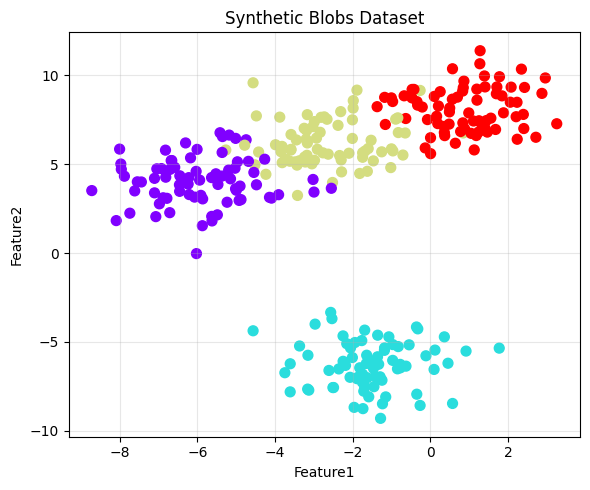

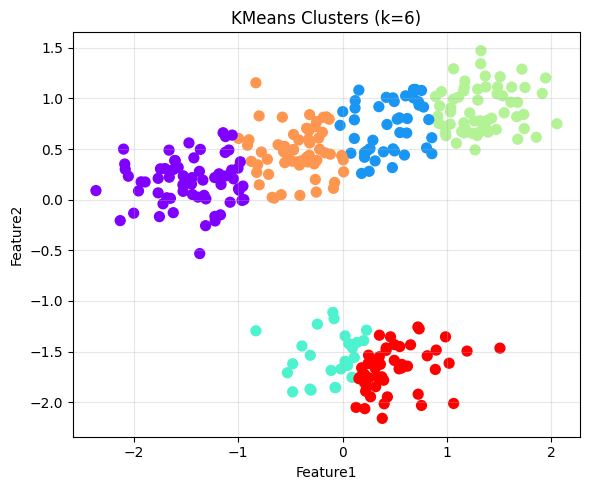

In [77]:
# 💻 Andrade Peñafiel Mateo APM
# 💻 Huilca Revelo Victor German HRVG   
# 💻 Espinoza Bone Jose Manuel EBJM

RANDOM_STATE = ord('A') + ord('P') + ord('M') + ord('H') + ord('R') + ord('V') + ord('G') + ord('E') + ord('B') + ord('J') + ord('M') # APMHRVGEBJM

# Crear un dataset sintético de blobs
def CreateSyntheticBlobsDataset() -> Dataset:
    X, y = make_blobs(n_samples = 300, centers = 4, random_state = RANDOM_STATE, cluster_std = 1.2) 

    dfX = pandas.DataFrame(
        X,
        columns=[f"Feature{i+1}" for i in range(X.shape[1])]
    )
    dfY = pandas.DataFrame(
        y,
        columns=["Target"]
    )
    dataset = Dataset(
        X=dfX,
        y=dfY
    )
    return dataset

# Función para plotear el dataset sintético de blobs
def PlotSyntheticBlobsDataset(dataset: Dataset, targetCol: str = "Target"):
    plt.figure(figsize=(6, 5))
    colors = (
        dataset.y[targetCol]
        if dataset.y is not None
        else "gray"
    )
    plt.scatter(
        dataset.X.iloc[:, 0],
        dataset.X.iloc[:, 1],
        s=50,
        c=colors,
        cmap="rainbow"
    )

    plt.xlabel(dataset.X.columns[0])
    plt.ylabel(dataset.X.columns[1])
    plt.title("Synthetic Blobs Dataset")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def Plot2DDataset(dataset: Dataset, targetFeatureCol: str = "Target", title: str = "2D Dataset"):
    plt.figure(figsize=(6, 5))
    colors = (
        dataset.X[targetFeatureCol]
        if dataset.y is not None
        else "gray"
    )
    plt.scatter(
        dataset.X.iloc[:, 0],
        dataset.X.iloc[:, 1],
        s=50,
        c=colors,
        cmap="rainbow"
    )

    plt.xlabel(dataset.X.columns[0])
    plt.ylabel(dataset.X.columns[1])
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
scaler = CreateScaler(ScalerType.STANDARD)
dataset = CreateSyntheticBlobsDataset()
scaledDataset = ScaleDataset(dataset, scaler)
pcaDataset = ApplyPCA(scaledDataset, explainedVarianceRatioSum=0.95)

PlotSyntheticBlobsDataset(dataset)
#ShowDatasetInfo(dataset, "Synthetic Blobs Dataset")

KMEANS_CLUSTERS = 6

kmeansFeatureColName = "KMeansCluster"
kmeansDataset = EvaluateKMeans(scaledDataset, KMEANS_CLUSTERS, RANDOM_STATE, kmeansFeatureColName)
Plot2DDataset(kmeansDataset, kmeansFeatureColName, f"KMeans Clusters (k={KMEANS_CLUSTERS})")

# 2️⃣ Número óptimo de clusters con técnica del codo    

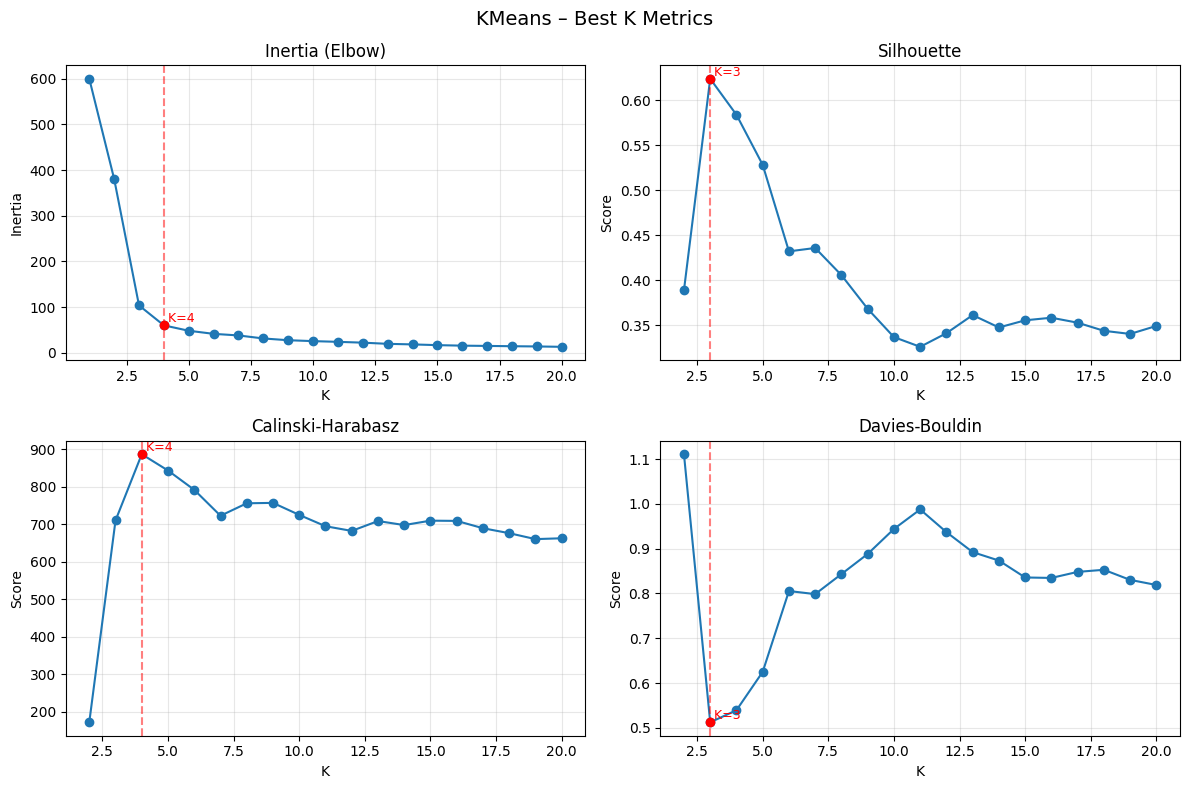

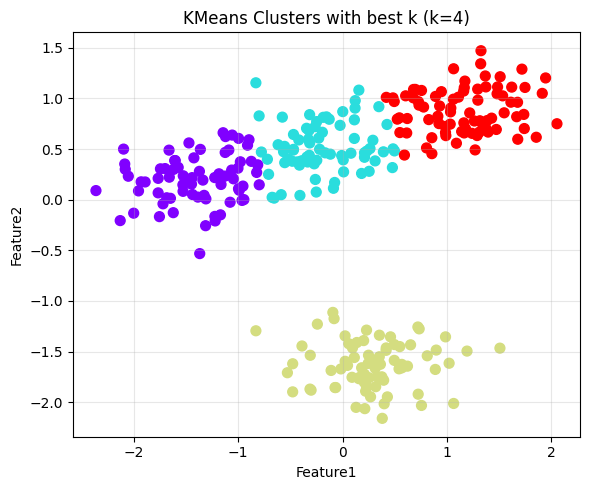

In [78]:
kmeansBestKResult = EvaluateKmeansBestKs(scaledDataset.X, 20, RANDOM_STATE, showPlot=True)
kmeansBestK = kmeansBestKResult.Elbow.BestK
KMEANS_CLUSTERS = kmeansBestK if  kmeansBestK is not None else 2
kmeansDataset2 = EvaluateKMeans(scaledDataset, KMEANS_CLUSTERS, RANDOM_STATE, kmeansFeatureColName)
Plot2DDataset(kmeansDataset2, kmeansFeatureColName, f"KMeans Clusters with best k (k={KMEANS_CLUSTERS})")


# 3️⃣ Comparativa con otros modelos

╔════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                                              DBSCAN Clustering Evaluation                                                              ║
╚════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╝


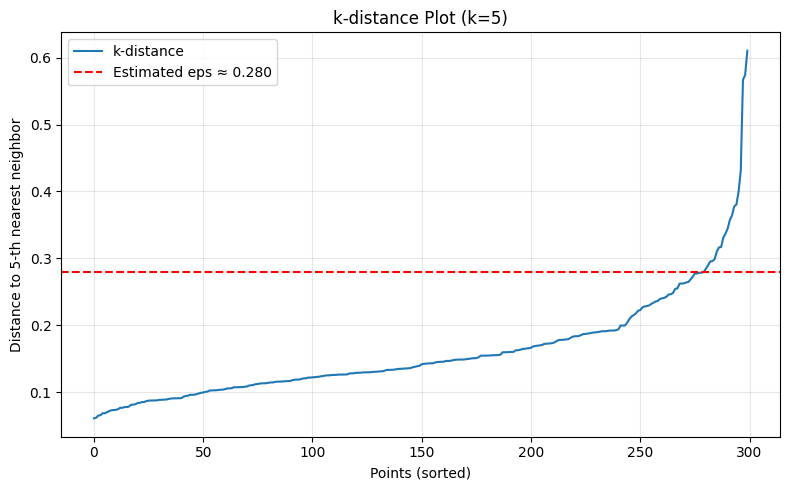

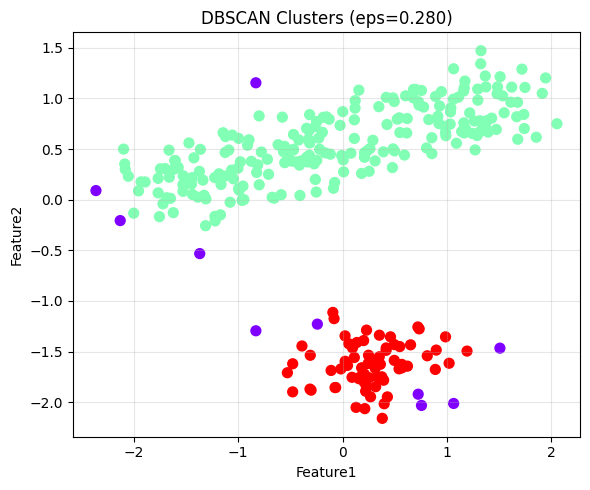

╔════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                                           Hierarchical Clustering Evaluation                                                           ║
╚════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╝


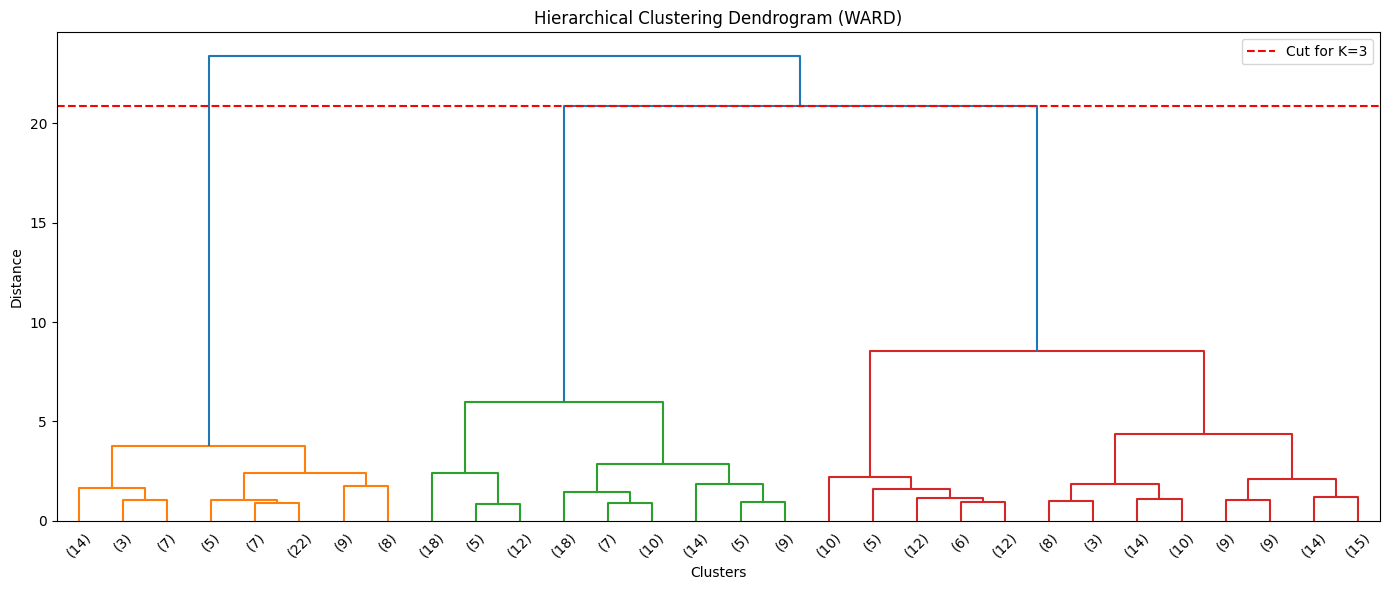

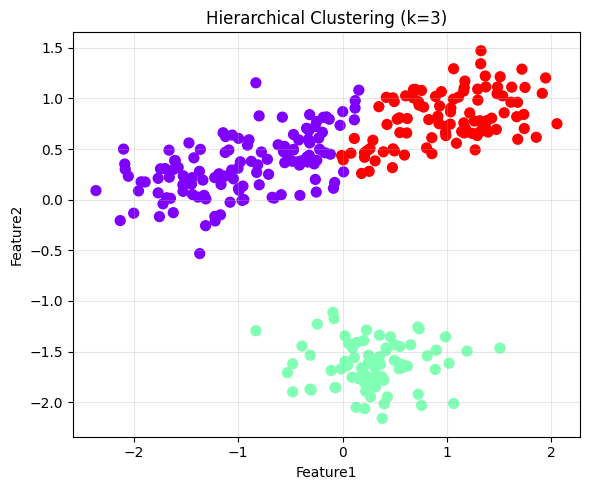

╔════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                                              KMeans Clustering Evaluation                                                              ║
╚════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╝


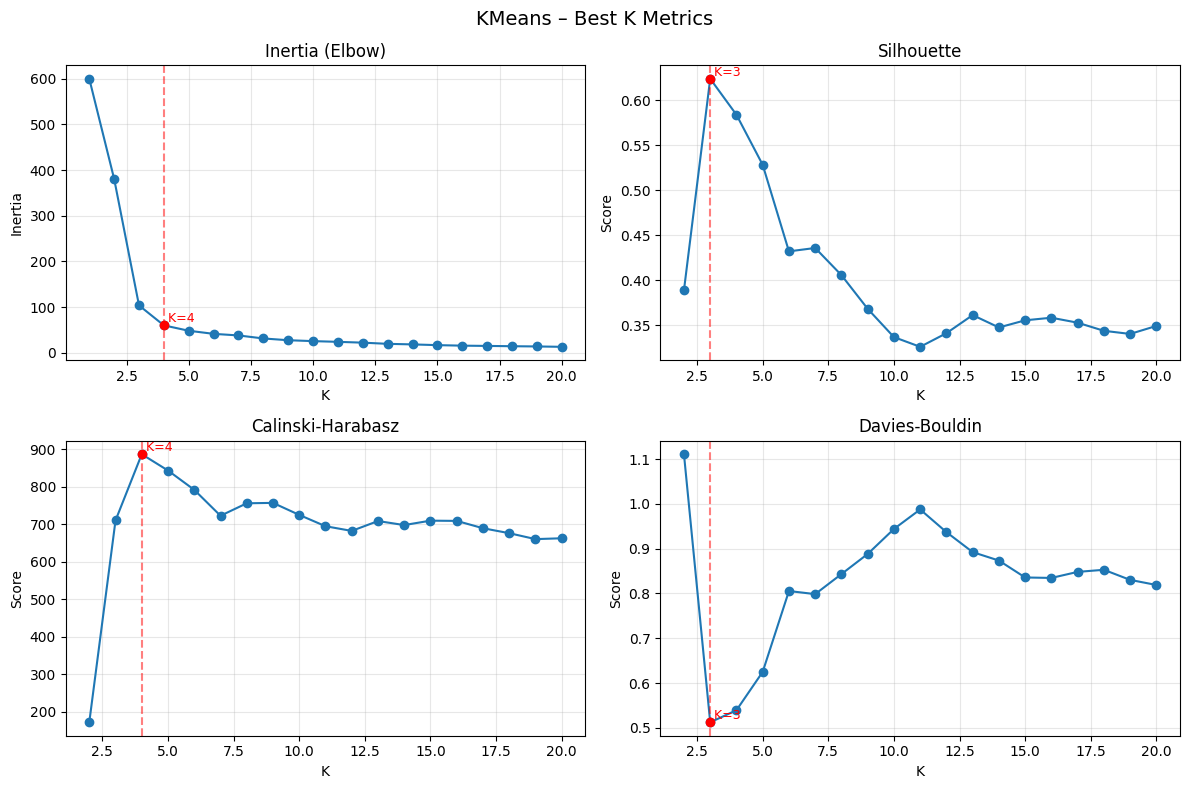

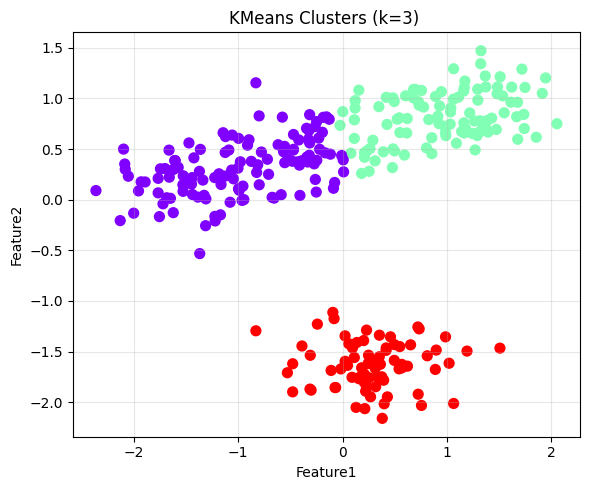

In [79]:
ShowTitleBox("DBSCAN Clustering Evaluation", 150, TitleBoxLineStyle.DOUBLE, ConsoleColor.MAGENTA)
dBSCANEvaluateEpsResult = EvaluateDBScanBestEps(scaledDataset, k=5, showPlot=True)
dbscanEps = dBSCANEvaluateEpsResult.Eps
if dbscanEps is not None:   
    dbscanFeatureColName = "DBSCANCluster"
    dbscanDataset = EvaluateDBSCAN(scaledDataset, dbscanEps, minSamples=5, metric=DistanceMetric.EUCLIDEAN, clusterColName=dbscanFeatureColName)
    Plot2DDataset(dbscanDataset, dbscanFeatureColName, f"DBSCAN Clusters (eps={dbscanEps:.3f})")

ShowTitleBox("Hierarchical Clustering Evaluation", 150, TitleBoxLineStyle.DOUBLE, ConsoleColor.MAGENTA)
hcBestKResult = EvaluateHierarchicalBestKs(scaledDataset.X, kMax=20, method=LinkageMethod.WARD, showDendrogram=True)
hcBestK = hcBestKResult.ResolvedBestK
HIERARCHICAL_CLUSTERS = hcBestK if hcBestK is not None else 2
hcFeatureColName = "HierarchicalCluster"
hcDataset = EvaluateHC(scaledDataset, HIERARCHICAL_CLUSTERS, method=LinkageMethod.WARD, clusterColName=hcFeatureColName)
Plot2DDataset(hcDataset, hcFeatureColName, f"Hierarchical Clustering (k={HIERARCHICAL_CLUSTERS})")

ShowTitleBox("KMeans Clustering Evaluation", 150, TitleBoxLineStyle.DOUBLE, ConsoleColor.MAGENTA)
kmeansBestKResult = EvaluateKmeansBestKs(pcaDataset.X, 20, RANDOM_STATE, showPlot=True)
kmeansBestK = kmeansBestKResult.ResolvedBestK
KMEANS_CLUSTERS = kmeansBestK if  kmeansBestK is not None else 2
kmeansDataset = EvaluateKMeans(scaledDataset, KMEANS_CLUSTERS, RANDOM_STATE, kmeansFeatureColName)
Plot2DDataset(kmeansDataset, kmeansFeatureColName, f"KMeans Clusters (k={KMEANS_CLUSTERS}) ")